In [3]:
!pip install pandas_profiling
!pip install sweetviz

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [5]:
data1 = pd.read_csv("C:\\Users\\Admin\\Downloads\\delivery_time.csv")

In [6]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
type(data1)
data1.shape

(21, 2)

In [8]:
data1.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
data2=data1.iloc[:,:]

In [11]:
data2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
data=data2.copy()

In [13]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
data[data.duplicated()].shape

(0, 2)

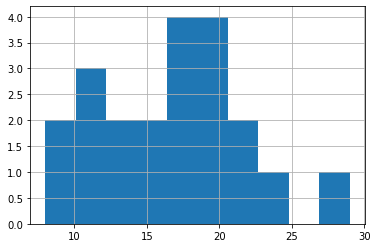

In [15]:
data['Delivery Time'].hist()

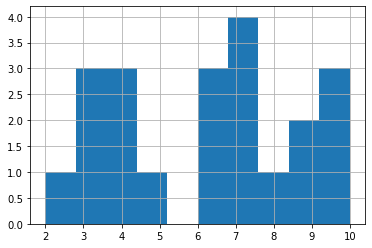

In [16]:
data['Sorting Time'].hist()

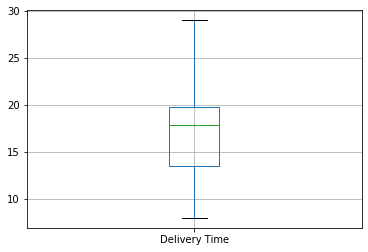

In [17]:
data.boxplot(column=['Delivery Time'])

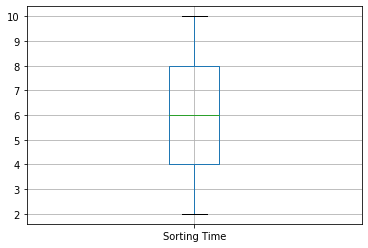

In [18]:
data.boxplot(column=['Sorting Time'])

In [19]:
data['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

In [20]:
data['Sorting Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64

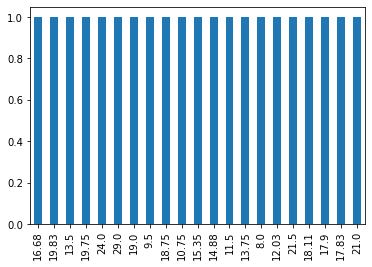

In [21]:
data['Delivery Time'].value_counts().plot.bar()

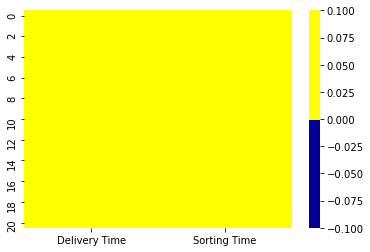

In [22]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [23]:
data[data.isnull().any(axis=1)].head()

,Delivery Time,Sorting Time


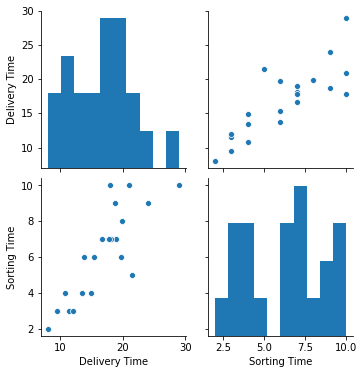

In [24]:
import seaborn as sns
sns.pairplot(data)

In [25]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [26]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [27]:
data.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [33]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:20])


In [35]:
set_printoptions(precision=2)
print(rescaledX[0:20,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]]


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)


In [39]:
set_printoptions(precision=2)
print(rescaledX[0:20,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]
 [-0.29 -0.08]
 [ 0.45  0.33]
 [-1.47 -1.29]
 [ 0.22  1.54]
 [ 0.4   1.13]
 [ 0.61  0.73]
 [-1.22 -0.88]
 [-0.02  0.33]
 [-1.07 -1.29]
 [-0.96 -1.29]
 [-0.39 -0.88]
 [-0.61 -0.08]
 [ 0.27  0.33]
 [-1.78 -1.69]
 [ 0.21  0.33]]


In [45]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='reports.html')

In [46]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Time.html')


Report Time.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


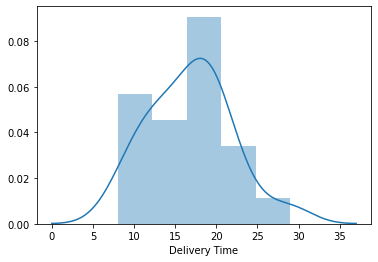

In [40]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

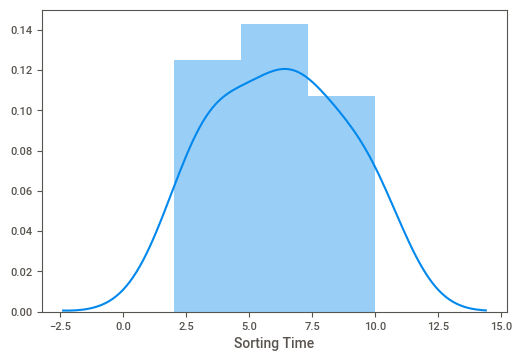

In [49]:
sns.distplot(data['Sorting Time'])

In [47]:
data1 = data1.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)

In [48]:
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [50]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data1).fit()

In [51]:
model

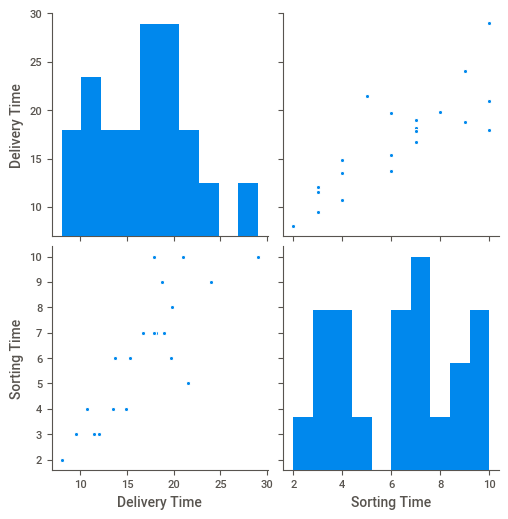

In [85]:
sns.pairplot(data)

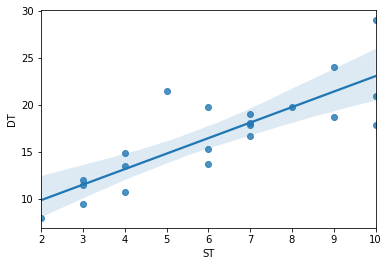

In [52]:
sns.regplot(x="ST", y="DT", data=data1);

In [54]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [55]:
print(model.tvalues, '\n', model.pvalues)  

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [56]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.98e-06
Time:                        23:07:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model.predict(data1)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64